# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [4]:
import numpy as np
import scipy as sc
from scipy import optimize as op
import matplotlib.pyplot as plt


In [10]:
def funPara(R,v0,theta,b):
  g=9.8
  Th=np.deg2rad(theta)
  v0x=v0*np.cos(Th)
  v0y=v0*np.sin(Th)
  y1=((g/b)+v0y)*R/v0x
  y2= g/b**2
  y3=np.log(1-R*b/v0x)
  return y1+(y2*y3)


\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}


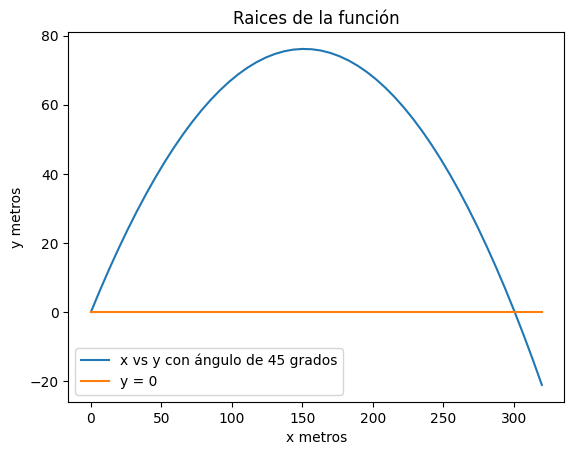

In [11]:
#para hallar el alcance máximo utilizaremos metodo de la secante, sabemos que se alcanza cuando y=0
#Primero graficamos para aproximar un punto inicial
Rx=np.linspace(0,320)
plt.plot(Rx,funPara(Rx,55,45,0.005), label="x vs y con ángulo de 45 grados")
# Grafica la recta y = 0
y = [0] * len(Rx)

plt.plot(Rx, y, label='y = 0')
plt.xlabel('x metros')
plt.ylabel('y metros')
plt.title('Raices de la función')
plt.legend()


In [12]:

#Hallar el alcance máximo con metodo de la secante
Almax= op.newton(funPara,220, args=(55,45,0.005))
# La raiz es aprox 300
print("El alcance máximo es",Almax, "metros")


El alcance máximo es 300.6920766932041 metros


In [13]:
#validemos la respuesta anterior utilzando bisección
AlmaxBic = op.bisect(funPara,250,350, args=(55,45,0.005))
#Definimos una la funcion del tiempo de vuelo:
def tiempvu(R,v0,b,th):
  theta=np.deg2rad(th)
  tv=(-1/b)*np.log(1-(R*b/(v0*np.cos(theta))))
  return tv
tiempVue= tiempvu(Almax,55,0.005,45)

print("EL alcance con el metodo de la bisección es", AlmaxBic, "metros, y el tiempo de vuelo es de", tiempVue, "segundos")


EL alcance con el metodo de la bisección es 300.69207669319127 metros, y el tiempo de vuelo es de 7.8851018331645735 segundos



\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


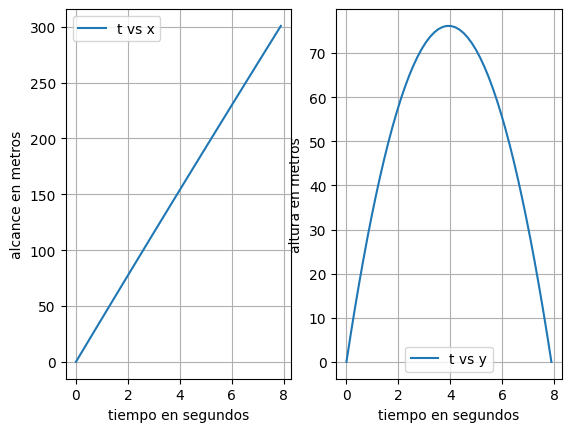

In [14]:
def trayX(t):
    theta=np.deg2rad(45)
    b=0.005
    v0=55
    x= (v0*np.cos(theta)/b)*(1-np.exp(-b*t))
    return x

def trayY(t):
    theta=np.deg2rad(45)
    g=9.8
    b=0.005
    v0=55
    y= ((1/b)*((g/b)+v0*np.sin(theta))*(1-np.exp(-b*t)))
    y2= -(g/b)*t
    return y+y2
t=np.linspace(0,tiempVue)

fig, axs = plt.subplots(1,2)

axs[0].plot(t,trayX(t), label='t vs x')
axs[1].plot(t,trayY(t), label='t vs y')
axs[0].legend()
axs[1].legend()
axs[0].set_xlabel('tiempo en segundos')
axs[1].set_xlabel('tiempo en segundos')
axs[0].set_ylabel('alcance en metros')
axs[1].set_ylabel('altura en metros')
axs[0].grid()
axs[1].grid()

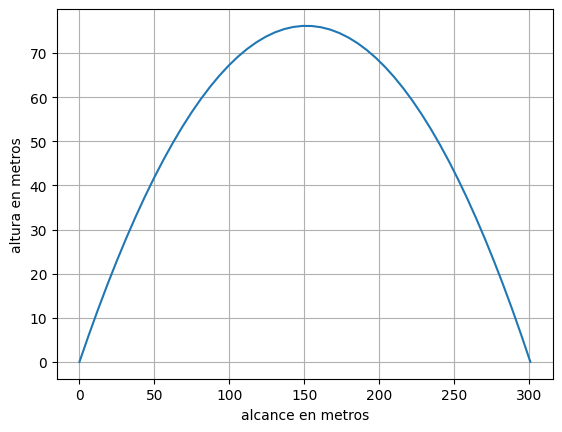

In [15]:

plt.plot(trayX(t),trayY(t), label='x,y')
plt.xlabel('alcance en metros')
plt.ylabel('altura en metros');
plt.grid()

Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```

In [16]:
theta= np.arange(0,90,5)
angulos= np.zeros(len(theta))
alcan_max=np.zeros(len(theta))
contador=0
for i in theta:
  alcan_max1=op.newton(funPara,220, args=(40,i,0.009))
  alcan_max[contador]=alcan_max1
  contador=contador+1

for i in range(0,len(theta)):
  print(f'para la {theta[i]} se tiene un alacnce maximo de  {alcan_max[i]}')


para la 0 se tiene un alacnce maximo de  4.398927595182821e-06
para la 5 se tiene un alacnce maximo de  28.230148289276485
para la 10 se tiene un alacnce maximo de  55.36860162392923
para la 15 se tiene un alacnce maximo de  80.6091674708031
para la 20 se tiene un alacnce maximo de  103.21229431322179
para la 25 se tiene un alacnce maximo de  122.52570349280064
para la 30 se tiene un alacnce maximo de  138.00196717538893
para la 35 se tiene un alacnce maximo de  149.21265322242897
para la 40 se tiene un alacnce maximo de  155.8587730872973
para la 45 se tiene un alacnce maximo de  157.77738132499897
para la 50 se tiene un alacnce maximo de  154.94428205519728
para la 55 se tiene un alacnce maximo de  147.4728966298502
para la 60 se tiene un alacnce maximo de  135.6094364129431
para la 65 se tiene un alacnce maximo de  119.72460416184576
para la 70 se tiene un alacnce maximo de  100.30211669916662
para la 75 se tiene un alacnce maximo de  77.92440045689749
para la 80 se tiene un alacnce

In [17]:
##Verificamos una de las raices
#RXX=np.linspace(0,200)
#plt.plot(RXX, funPara(RXX,40,45,0.009))
#alcan_max

In [18]:
##Ahora el tiempo de vuelo
def tiempvu(R,v0,b,th):
  al=np.deg2rad(th)
  tv=(-1/b)*np.log(1-(R*b/(v0*np.cos(al))))
  return tv
lista=[]
for angulo in range(len(theta)):
  Tiempo_Vuelo_iecimo=tiempvu(alcan_max[angulo],40,0.009,theta[angulo])
  lista.append(Tiempo_Vuelo_iecimo)
  print(f'el alcance maximo de con ángulo {theta[i]} es {alcan_max[angulo]} metros, y el tiempo de vuelo es de {Tiempo_Vuelo_iecimo} segundos')

el alcance maximo de con ángulo 85 es 4.398927595182821e-06 metros, y el tiempo de vuelo es de 1.0997319110191387e-07 segundos
el alcance maximo de con ángulo 85 es 28.230148289276485 metros, y el tiempo de vuelo es de 0.7107177718926966 segundos
el alcance maximo de con ángulo 85 es 55.36860162392923 metros, y el tiempo de vuelo es de 1.4145347893218283 segundos
el alcance maximo de con ángulo 85 es 80.6091674708031 metros, y el tiempo de vuelo es de 2.106154739613613 segundos
el alcance maximo de con ángulo 85 es 103.21229431322179 metros, y el tiempo de vuelo es de 2.7804053104882023 segundos
el alcance maximo de con ángulo 85 es 122.52570349280064 metros, y el tiempo de vuelo es de 3.4322745123331186 segundos
el alcance maximo de con ángulo 85 es 138.00196717538893 metros, y el tiempo de vuelo es de 4.056944997531326 segundos
el alcance maximo de con ángulo 85 es 149.21265322242897 metros, y el tiempo de vuelo es de 4.649826243700971 segundos
el alcance maximo de con ángulo 85 es 1

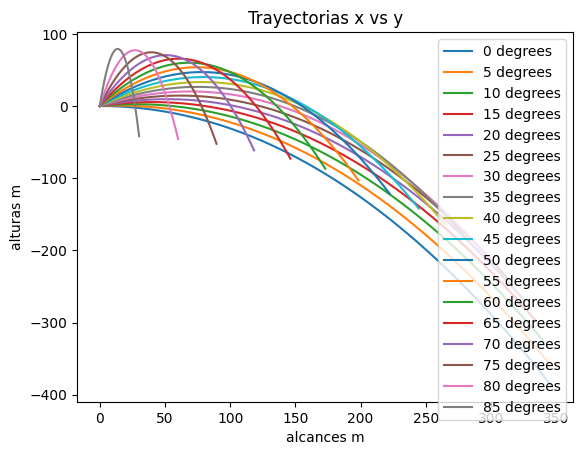

In [19]:
def trayX2(t,th):
    theta=np.deg2rad(th)
    b=0.009
    v0=40
    x= (v0*np.cos(theta)/b)*(1-np.exp(-b*t))
    return x

def trayY2(t,th):
    theta=np.deg2rad(th)
    b=0.009
    v0=40
    g=9.8
    y= ((1/b)*((g/b)+v0*np.sin(theta))*(1-np.exp(-b*t)))
    y2= -(g/b)*t
    return y+y2
dom=np.linspace(0,9)
for i in range(len(theta)):
  plt.plot(trayX2(dom,theta[i]),trayY2(dom,theta[i]), label=f'{theta[i]} degrees')
  plt.title("Trayectorias x vs y")
  plt.grid()
  plt.xlabel("alcances m")
  plt.ylabel("alturas m")
  plt.legend();